In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score

### Canceling the errors that would happen

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [2]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,...,CRLN_OBS,CRLT_OBS,CRVAL2,HC_ANGLE,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX,XR_MAX,y
0,999,2010-12-11 05:36:00,111.984296,1.174571e+09,7.394561e+21,2.685332e+12,6.372923,6.797286e+11,2.542057e+21,-1.105683e+24,...,168.930466,-0.409282,-25.383249,47.939042,-29.417252,36.406315,-22.812580,46.180901,1.491900e-07,0
1,22,2012-12-08 08:36:00,65.279249,7.122294e+08,5.012428e+21,1.051949e+12,12.965183,8.565763e+11,9.200423e+20,-5.423253e+23,...,278.518768,-0.105652,13.231450,49.051251,12.177995,45.735317,14.006503,49.807713,1.572300e-07,0
2,25,2015-11-12 16:12:00,101.486815,5.919650e+08,7.501978e+21,2.104990e+12,24.713743,5.821535e+11,6.913135e+20,-2.756448e+23,...,204.348877,3.176614,6.305100,24.360022,5.522398,-26.262897,7.838166,-21.370865,2.768200e-07,0
3,98,2018-08-06 08:00:00,133.111181,1.687655e+09,8.191348e+21,3.017439e+12,9.568157,3.241827e+11,3.541698e+21,-1.712364e+24,...,356.603333,6.133725,3.865450,60.133104,1.748554,-61.873131,5.650918,-56.474663,1.494200e-08,0
4,1,2013-03-12 13:00:00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,118.093590,-7.195279,14.998800,24.861502,NaN,NaN,NaN,NaN,1.032900e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,1030,2011-03-10 22:36:00,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,...,67.468994,-7.240461,9.587800,28.869596,4.225533,14.283173,15.059839,32.556358,1.121200e-05,3
32956,1180,2011-03-12 04:36:00,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,...,51.001186,-7.227551,9.587800,43.519113,4.232615,30.623676,15.223266,49.177036,1.305500e-05,3
32957,1069,2011-12-25 18:12:00,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,...,200.018417,-2.184514,-21.472050,33.253378,-25.172194,20.080900,-18.843140,34.468266,4.007700e-05,3
32958,1110,2011-12-26 02:24:00,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,...,195.499207,-2.243380,-21.472050,36.947555,-25.116602,24.588448,-18.504770,38.798409,1.524000e-05,3


### Splitting TimeStamp column into Month, Day, Hour, and Minute

In [3]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Month"] = data["Timestamp"].dt.month
data["Day"] = data["Timestamp"].dt.day
data["Hour"] = data["Timestamp"].dt.hour
data["Minute"] = data["Timestamp"].dt.minute
data

,Unnamed: 0,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,...,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX,XR_MAX,y,Month,Day,Hour,Minute
0,999,2010-12-11 05:36:00,111.984296,1.174571e+09,7.394561e+21,2.685332e+12,6.372923,6.797286e+11,2.542057e+21,-1.105683e+24,...,-29.417252,36.406315,-22.812580,46.180901,1.491900e-07,0,12,11,5,36
1,22,2012-12-08 08:36:00,65.279249,7.122294e+08,5.012428e+21,1.051949e+12,12.965183,8.565763e+11,9.200423e+20,-5.423253e+23,...,12.177995,45.735317,14.006503,49.807713,1.572300e-07,0,12,8,8,36
2,25,2015-11-12 16:12:00,101.486815,5.919650e+08,7.501978e+21,2.104990e+12,24.713743,5.821535e+11,6.913135e+20,-2.756448e+23,...,5.522398,-26.262897,7.838166,-21.370865,2.768200e-07,0,11,12,16,12
3,98,2018-08-06 08:00:00,133.111181,1.687655e+09,8.191348e+21,3.017439e+12,9.568157,3.241827e+11,3.541698e+21,-1.712364e+24,...,1.748554,-61.873131,5.650918,-56.474663,1.494200e-08,0,8,6,8,0
4,1,2013-03-12 13:00:00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,1.032900e-06,0,3,12,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,1030,2011-03-10 22:36:00,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,...,4.225533,14.283173,15.059839,32.556358,1.121200e-05,3,3,10,22,36
32956,1180,2011-03-12 04:36:00,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,...,4.232615,30.623676,15.223266,49.177036,1.305500e-05,3,3,12,4,36
32957,1069,2011-12-25 18:12:00,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,...,-25.172194,20.080900,-18.843140,34.468266,4.007700e-05,3,12,25,18,12
32958,1110,2011-12-26 02:24:00,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,...,-25.116602,24.588448,-18.504770,38.798409,1.524000e-05,3,12,26,2,24


In [4]:
new_data = data
new_data = new_data.drop(["Unnamed: 0", "Timestamp"], axis=1)
new_data.columns

Index(['TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP',
       'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45', 'MEANGAM',
       'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD',
       'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE', 'CRVAL1', 'CRLN_OBS',
       'CRLT_OBS', 'CRVAL2', 'HC_ANGLE', 'LAT_MIN', 'LON_MIN', 'LAT_MAX',
       'LON_MAX', 'XR_MAX', 'y', 'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [6]:
new_data = new_data.dropna()
new_data

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX,XR_MAX,y,Month,Day,Hour,Minute
0,111.984296,1.174571e+09,7.394561e+21,2.685332e+12,6.372923,6.797286e+11,2.542057e+21,-1.105683e+24,1289.487977,-0.708825,...,-29.417252,36.406315,-22.812580,46.180901,1.491900e-07,0,12,11,5,36
1,65.279249,7.122294e+08,5.012428e+21,1.051949e+12,12.965183,8.565763e+11,9.200423e+20,-5.423253e+23,3366.899402,-0.573360,...,12.177995,45.735317,14.006503,49.807713,1.572300e-07,0,12,8,8,36
2,101.486815,5.919650e+08,7.501978e+21,2.104990e+12,24.713743,5.821535e+11,6.913135e+20,-2.756448e+23,4406.312195,-0.350624,...,5.522398,-26.262897,7.838166,-21.370865,2.768200e-07,0,11,12,16,12
3,133.111181,1.687655e+09,8.191348e+21,3.017439e+12,9.568157,3.241827e+11,3.541698e+21,-1.712364e+24,1060.153756,-0.764011,...,1.748554,-61.873131,5.650918,-56.474663,1.494200e-08,0,8,6,8,0
5,145.515156,1.637559e+09,1.138631e+22,3.101573e+12,6.738570,5.365026e+11,2.868198e+21,-1.402268e+24,2025.931861,-0.644795,...,10.157719,37.133247,14.733677,50.602448,2.434400e-07,0,1,11,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,14361.691248,-0.094651,...,4.225533,14.283173,15.059839,32.556358,1.121200e-05,3,3,10,22,36
32956,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,11193.985687,-0.186151,...,4.232615,30.623676,15.223266,49.177036,1.305500e-05,3,3,12,4,36
32957,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,9093.373367,-0.189034,...,-25.172194,20.080900,-18.843140,34.468266,4.007700e-05,3,12,25,18,12
32958,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,8169.300029,-0.236339,...,-25.116602,24.588448,-18.504770,38.798409,1.524000e-05,3,12,26,2,24


In [7]:
new_data.columns

Index(['TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP',
       'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45', 'MEANGAM',
       'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD',
       'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE', 'CRVAL1', 'CRLN_OBS',
       'CRLT_OBS', 'CRVAL2', 'HC_ANGLE', 'LAT_MIN', 'LON_MIN', 'LAT_MAX',
       'LON_MAX', 'XR_MAX', 'y', 'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [9]:
new_data

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX,XR_MAX,y,Month,Day,Hour,Minute
0,111.984296,1.174571e+09,7.394561e+21,2.685332e+12,6.372923,6.797286e+11,2.542057e+21,-1.105683e+24,1289.487977,-0.708825,...,-29.417252,36.406315,-22.812580,46.180901,1.491900e-07,0,12,11,5,36
1,65.279249,7.122294e+08,5.012428e+21,1.051949e+12,12.965183,8.565763e+11,9.200423e+20,-5.423253e+23,3366.899402,-0.573360,...,12.177995,45.735317,14.006503,49.807713,1.572300e-07,0,12,8,8,36
2,101.486815,5.919650e+08,7.501978e+21,2.104990e+12,24.713743,5.821535e+11,6.913135e+20,-2.756448e+23,4406.312195,-0.350624,...,5.522398,-26.262897,7.838166,-21.370865,2.768200e-07,0,11,12,16,12
3,133.111181,1.687655e+09,8.191348e+21,3.017439e+12,9.568157,3.241827e+11,3.541698e+21,-1.712364e+24,1060.153756,-0.764011,...,1.748554,-61.873131,5.650918,-56.474663,1.494200e-08,0,8,6,8,0
5,145.515156,1.637559e+09,1.138631e+22,3.101573e+12,6.738570,5.365026e+11,2.868198e+21,-1.402268e+24,2025.931861,-0.644795,...,10.157719,37.133247,14.733677,50.602448,2.434400e-07,0,1,11,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,14361.691248,-0.094651,...,4.225533,14.283173,15.059839,32.556358,1.121200e-05,3,3,10,22,36
32956,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,11193.985687,-0.186151,...,4.232615,30.623676,15.223266,49.177036,1.305500e-05,3,3,12,4,36
32957,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,9093.373367,-0.189034,...,-25.172194,20.080900,-18.843140,34.468266,4.007700e-05,3,12,25,18,12
32958,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,8169.300029,-0.236339,...,-25.116602,24.588448,-18.504770,38.798409,1.524000e-05,3,12,26,2,24


In [10]:
# def find_highest_value(row):
#     flare_columns = ["XFLARE", "MFLARE", "CFLARE", "BFLARE"]
#     numeric_row = row[flare_columns].astype(float)  # Convert to float to handle non-numeric values
#     max_column = numeric_row.idxmax()
#     max_val = row[max_column]
    
#     if max_val == 0:
#         return None
#     else:
#         return f"{max_column}{max_val}"  

# new_data['predicted_flare'] = new_data.apply(find_highest_value, axis=1)

### Checking if there is any NaN values

In [41]:
new_data["y"].unique()
new_data.isnull().any()

TOTUSJH     False
TOTBSQ      False
TOTPOT      False
TOTUSJZ     False
ABSNJZH     False
SAVNCPP     False
USFLUX      False
TOTFZ       False
MEANPOT     False
EPSZ        False
MEANSHR     False
SHRGT45     False
MEANGAM     False
MEANGBT     False
MEANGBZ     False
MEANGBH     False
MEANJZH     False
TOTFY       False
MEANJZD     False
MEANALP     False
TOTFX       False
EPSY        False
EPSX        False
R_VALUE     False
CRVAL1      False
CRLN_OBS    False
CRLT_OBS    False
CRVAL2      False
HC_ANGLE    False
LAT_MIN     False
LON_MIN     False
LAT_MAX     False
LON_MAX     False
XR_MAX      False
y           False
Month       False
Day         False
Hour        False
Minute      False
dtype: bool

In [12]:
new_data

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX,XR_MAX,y,Month,Day,Hour,Minute
0,111.984296,1.174571e+09,7.394561e+21,2.685332e+12,6.372923,6.797286e+11,2.542057e+21,-1.105683e+24,1289.487977,-0.708825,...,-29.417252,36.406315,-22.812580,46.180901,1.491900e-07,0,12,11,5,36
1,65.279249,7.122294e+08,5.012428e+21,1.051949e+12,12.965183,8.565763e+11,9.200423e+20,-5.423253e+23,3366.899402,-0.573360,...,12.177995,45.735317,14.006503,49.807713,1.572300e-07,0,12,8,8,36
2,101.486815,5.919650e+08,7.501978e+21,2.104990e+12,24.713743,5.821535e+11,6.913135e+20,-2.756448e+23,4406.312195,-0.350624,...,5.522398,-26.262897,7.838166,-21.370865,2.768200e-07,0,11,12,16,12
3,133.111181,1.687655e+09,8.191348e+21,3.017439e+12,9.568157,3.241827e+11,3.541698e+21,-1.712364e+24,1060.153756,-0.764011,...,1.748554,-61.873131,5.650918,-56.474663,1.494200e-08,0,8,6,8,0
5,145.515156,1.637559e+09,1.138631e+22,3.101573e+12,6.738570,5.365026e+11,2.868198e+21,-1.402268e+24,2025.931861,-0.644795,...,10.157719,37.133247,14.733677,50.602448,2.434400e-07,0,1,11,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,14361.691248,-0.094651,...,4.225533,14.283173,15.059839,32.556358,1.121200e-05,3,3,10,22,36
32956,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,11193.985687,-0.186151,...,4.232615,30.623676,15.223266,49.177036,1.305500e-05,3,3,12,4,36
32957,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,9093.373367,-0.189034,...,-25.172194,20.080900,-18.843140,34.468266,4.007700e-05,3,12,25,18,12
32958,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,8169.300029,-0.236339,...,-25.116602,24.588448,-18.504770,38.798409,1.524000e-05,3,12,26,2,24


In [13]:
new_data = new_data.dropna()

In [14]:
# new_data = new_data.drop(["XFLARE", "MFLARE", "CFLARE", "BFLARE"], axis=1)

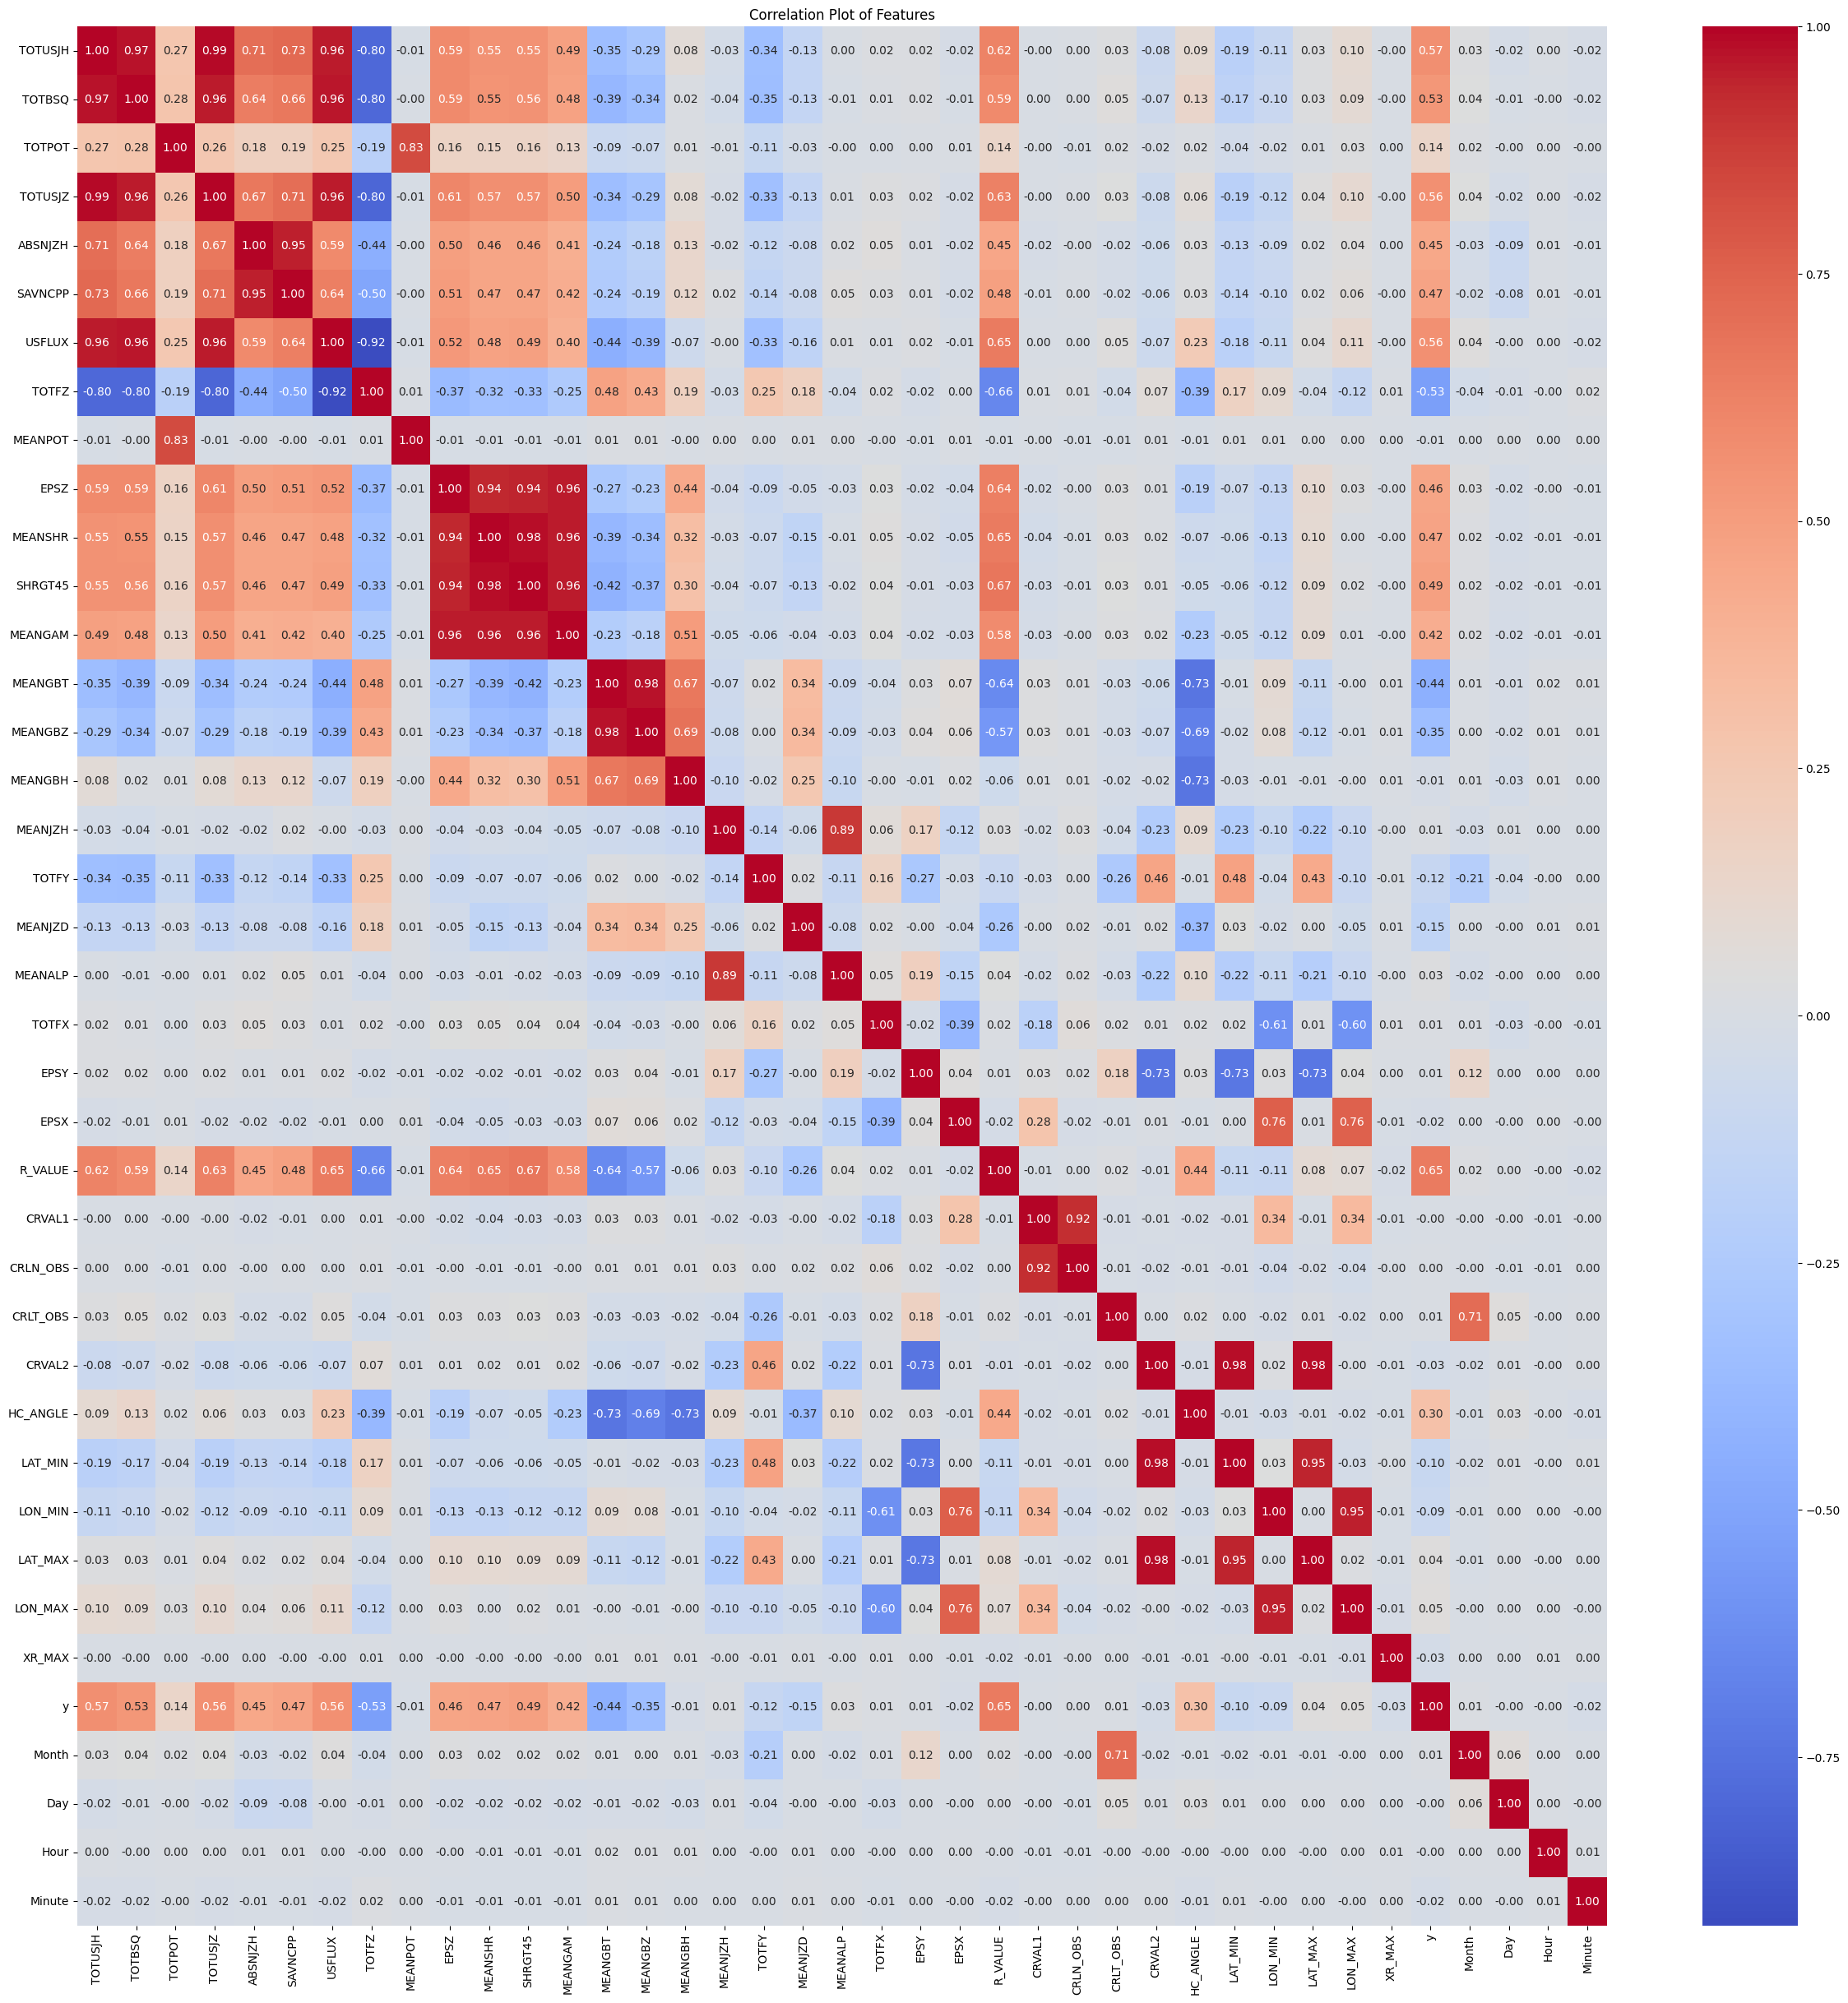

In [42]:
correlations = new_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Plot of Features')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# X = new_data.drop("predicted_flare", axis=1)
# y = new_data["predicted_flare"]
X = new_data.drop("y", axis=1)
y = new_data["y"]


### Selecting top 6 features based on highest correlation with the target column

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ["R_VALUE", "USFLUX", "TOTFZ", "TOTUSJH", "TOTBSQ", "TOTUSJZ"]

X = new_data[features]
X = scaler.fit_transform(X)

y = new_data["y"]

### Define kfold with 5

In [62]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


### Average is based on Weighted approach

In [46]:
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
fScore_scorer = make_scorer(f1_score, average='weighted')
accuracy_scorer = make_scorer(accuracy_score)

# Decision tree

In [55]:
dt = DecisionTreeClassifier(max_depth=10)


accuracy_results = cross_val_score(dt, X, y, cv=kfold)
precision_results = cross_val_score(dt, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(dt, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(dt, X, y, cv=kfold, scoring=fScore_scorer)

print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))

c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average accuracy: 0.7315960912052117
Average precision: 0.7079394951741644
Average recall: 0.7316271133860711
Average f_score: 0.7164522565082042


# KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors=10)



accuracy_results = cross_val_score(knn, X, y, cv=kfold)
precision_results = cross_val_score(knn, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(knn, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(knn, X, y, cv=kfold, scoring=fScore_scorer)
print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))


c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

Average accuracy: 0.7441600744532341
Average precision: 0.7240779042563595
Average recall: 0.7441600744532341
Average f_score: 0.7293295524154184


# Naive bayes

In [57]:
naive_bayes = GaussianNB()



accuracy_results = cross_val_score(naive_bayes, X, y, cv=kfold)
precision_results = cross_val_score(naive_bayes, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(naive_bayes, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(naive_bayes, X, y, cv=kfold, scoring=fScore_scorer)

print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))

Average accuracy: 0.6784861175740655
Average precision: 0.701366853243439
Average recall: 0.6784861175740655
Average f_score: 0.6840512386920858


# Logistic Regression

In [59]:
lr = LogisticRegression(solver="lbfgs", max_iter=1000)



accuracy_results = cross_val_score(lr, X, y, cv=kfold)
precision_results = cross_val_score(lr, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(lr, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(lr, X, y, cv=kfold, scoring=fScore_scorer)

print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))

c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

Average accuracy: 0.7372111059407477
Average precision: 0.7034824673306178
Average recall: 0.7372111059407477
Average f_score: 0.7025560905459703


# Soft ensemble learning

### Used brute force to find the best weights

In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


# The commented code is brute force that calculate the best weight for each base learner based on the highest f-score
# best_records =[0, 0, 0, 0, 0]
# for i in range(1, 5):
#     print(i)
#     for j in range(1, 5):
#         for k in range(1, 5):
#             for l in range(1, 5):
#                 ensemble_classifier = VotingClassifier(estimators=[
#                     ('lr', lg), 
#                     ('nv', naive_bayes), 
#                     ('knn', knn),
#                     ('dt', dt)], 
#                     voting='soft', weights=[i, j, k, l])
#                 fScore_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=fScore_scorer)
#                 if np.mean(fScore_results) > best_records[0]:
#                     best_records[0] = np.mean(fScore_results)
#                     best_records[1] = i
#                     best_records[2] = j
#                     best_records[3] = k
#                     best_records[4] = l


# print(best_records)         


'''
After running the above code it looks that these weights are the best based on the highest f-score: [1, 1, 3, 2]

'''
ensemble_classifier = VotingClassifier(estimators=[
                    ('lr', lr), 
                    ('nv', naive_bayes), 
                    ('knn', knn),
                    ('dt', dt)], 
                    voting='soft', weights=[1, 1, 3, 2])


accuracy_results = cross_val_score(ensemble_classifier, X, y, cv=kfold)
print("Average accuracy: " + str(np.mean(accuracy_results)))
precision_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=precision_scorer)
print("Average precision: " + str(np.mean(precision_results)))
recall_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=recall_scorer)
print("Average recall: " + str(np.mean(recall_results)))
fScore_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=fScore_scorer)
print("Average f_score: " + str(np.mean(fScore_results)))



Average accuracy: 0.7470761594540096
Average precision: 0.7294051999429524
Average recall: 0.7469210485497131
Average f_score: 0.73372817087651
